## Contents
- decision tree


### Linear
- Logistic Regression
- SVM(Support Vector Machine)

### Non Linear data
- KNN(Lazy algorithm)
- Decision tree
- Random Forest
- Naive Bayes Classifier etc,

### Decision tree(user for both regression and classification)

- id3
- cart(classification adn regression algorithm)

## id3
## Entropy - measure of uncertainity
## Information gain - difference between entropy before and after splitting data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [7]:
iris_df["target"] = iris.target

In [8]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [10]:
iris_df["target"].unique()

array([0, 1, 2])

In [11]:
x = iris_df.drop("target",axis =1)
x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [12]:
y = iris_df["target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
accuracy_score(y_test, y_pred)

0.9555555555555556

In [24]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [26]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

In [25]:
precision_score(y_test,y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

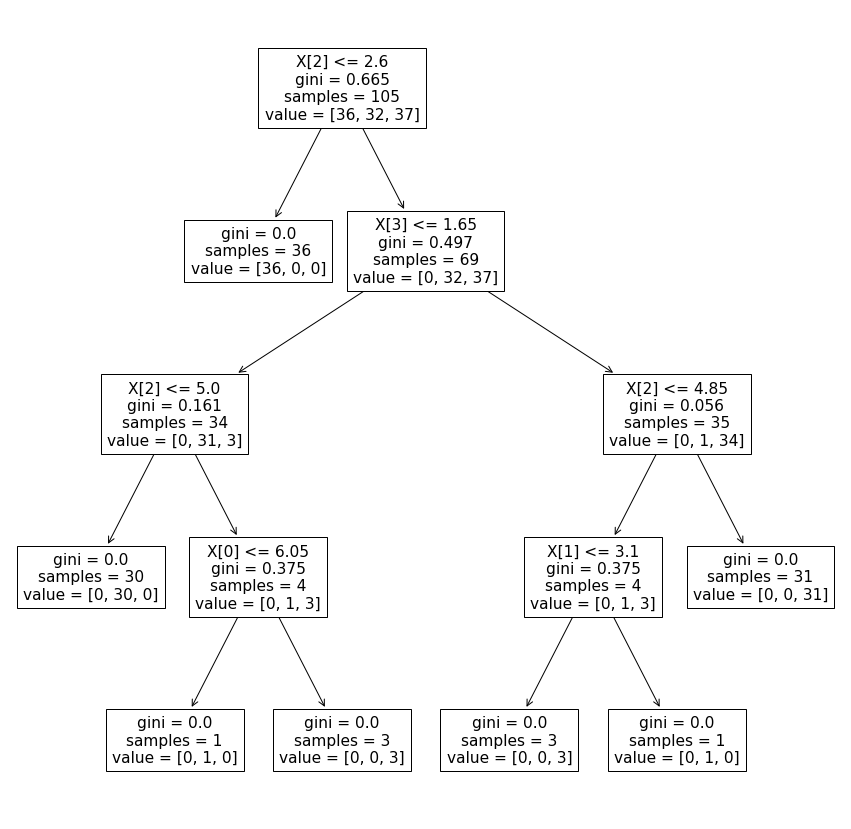

In [27]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

In [36]:
## Unsing entropy criterion

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

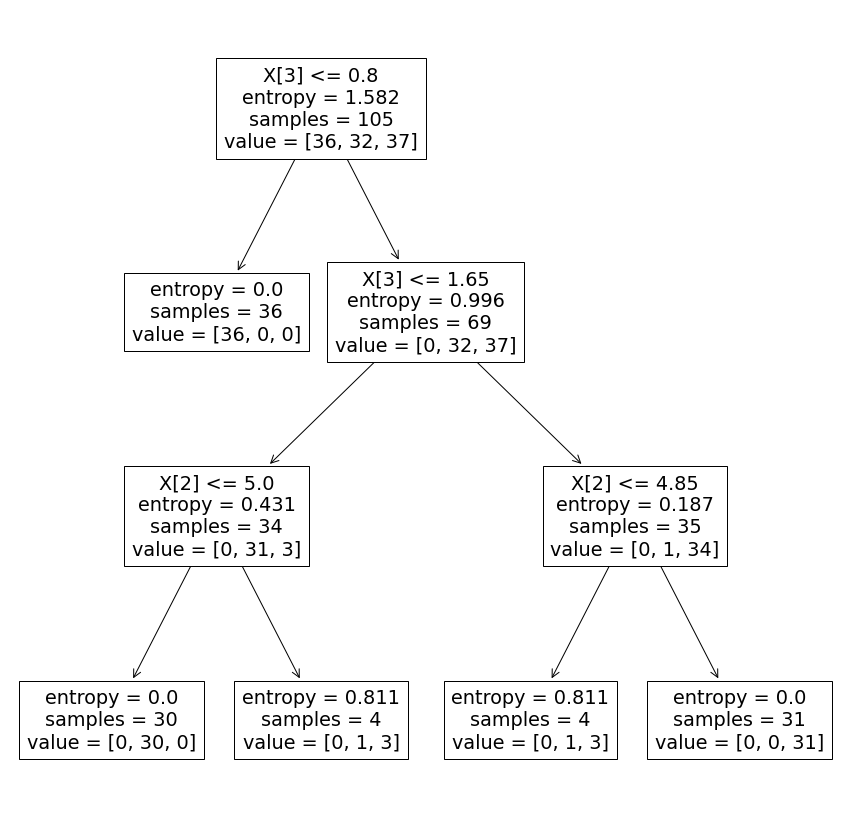

In [38]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

In [41]:
df1 = pd.read_csv("heart.csv")

In [42]:
df1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [43]:
x = df1.drop("target",axis = 1)

In [44]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [45]:
y = df1["target"]

In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state = 5)

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
accuracy_score(y_test, y_pred)

0.7692307692307693

In [52]:
confusion_matrix(y_test,y_pred)

array([[31,  9],
       [12, 39]], dtype=int64)

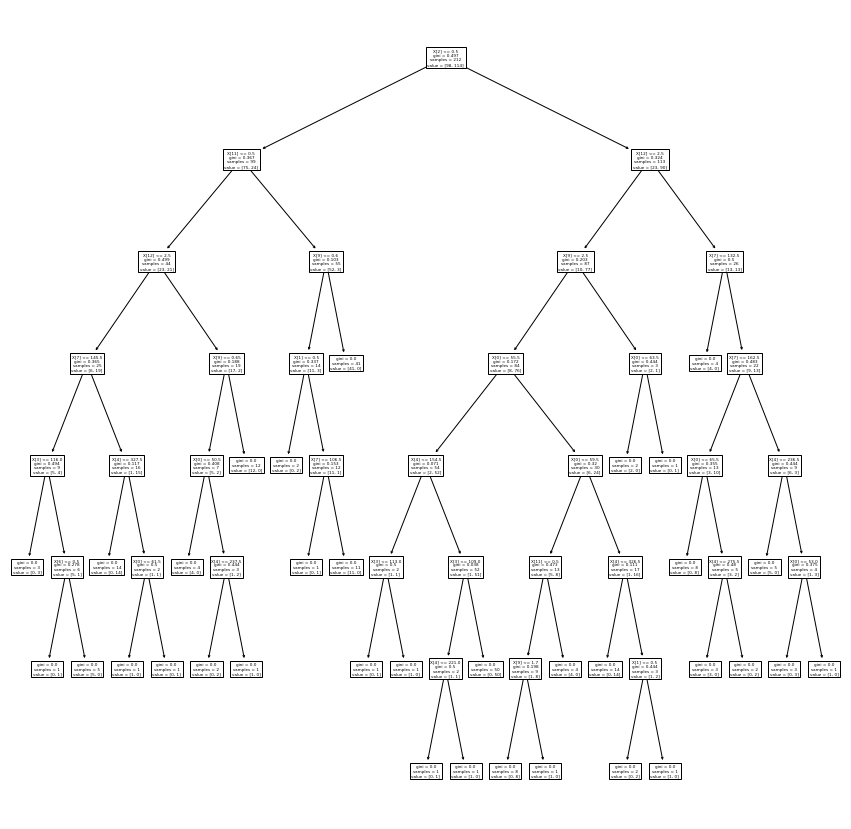

In [53]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

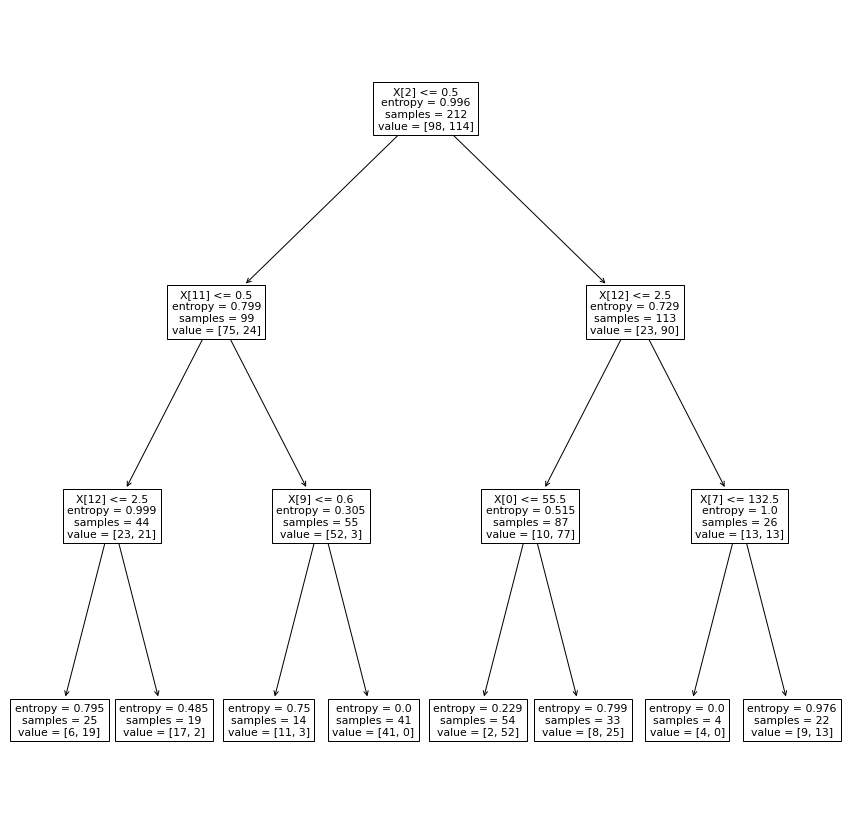

In [57]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

## decision tree regressor

In [63]:
df = pd.read_csv("age_salary_hours.csv")
df

Age  Annual Salary  Weekly hours                    Education
0     72       160000.0          40.0  Bachelor's degree or higher
1     72       100000.0          50.0  Bachelor's degree or higher
2     31       120000.0          40.0  Bachelor's degree or higher
3     28        45000.0          40.0  Bachelor's degree or higher
4     54        85000.0          40.0  Bachelor's degree or higher
..   ...            ...           ...                          ...
495   27        47000.0          40.0  Bachelor's degree or higher
496   53       132000.0          70.0  Bachelor's degree or higher
497   51        10100.0          20.0  Bachelor's degree or higher
498   32        57000.0          35.0  Bachelor's degree or higher
499   18        18700.0          20.0  Attended college, no degree

[500 rows x 4 columns]

In [64]:
df["Education"].unique()

array(["Bachelor's degree or higher", 'High school diploma',
       "Associate's degree", 'Attended college, no degree', 'No diploma'],
      dtype=object)

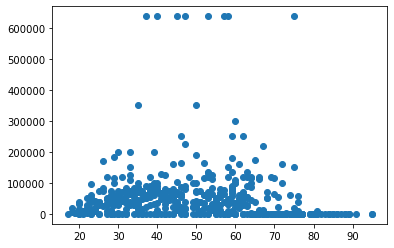

In [65]:
plt.scatter(df["Age"],df["Annual Salary"])

In [66]:
df.isna().sum()

Age              0
Annual Salary    0
Weekly hours     0
Education        0
dtype: int64

In [69]:
x =df.loc[:,["Age","Weekly hours"]]
x

Age  Weekly hours
0     72          40.0
1     72          50.0
2     31          40.0
3     28          40.0
4     54          40.0
..   ...           ...
495   27          40.0
496   53          70.0
497   51          20.0
498   32          35.0
499   18          20.0

[500 rows x 2 columns]

In [70]:
y = df["Annual Salary"]
y

0      160000.0
1      100000.0
2      120000.0
3       45000.0
4       85000.0
         ...   
495     47000.0
496    132000.0
497     10100.0
498     57000.0
499     18700.0
Name: Annual Salary, Length: 500, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state = 1)

In [81]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [82]:
y_pred = model.predict(x_test)
y_pred

array([6.88253425e+04, 6.88253425e+04, 6.88253425e+04, 1.02040816e-01,
       6.88253425e+04, 1.02040816e-01, 1.33364151e+05, 6.88253425e+04,
       6.88253425e+04, 1.02040816e-01, 1.33364151e+05, 6.88253425e+04,
       1.07210526e+04, 6.88253425e+04, 1.02040816e-01, 1.02040816e-01,
       6.88253425e+04, 1.33364151e+05, 1.33364151e+05, 1.02040816e-01,
       6.88253425e+04, 1.02040816e-01, 6.88253425e+04, 1.33364151e+05,
       1.33364151e+05, 6.88253425e+04, 1.02040816e-01, 1.02040816e-01,
       1.02040816e-01, 1.07210526e+04, 6.88253425e+04, 1.33364151e+05,
       6.88253425e+04, 6.88253425e+04, 6.88253425e+04, 1.07210526e+04,
       6.88253425e+04, 6.88253425e+04, 1.07210526e+04, 1.02040816e-01,
       1.02040816e-01, 6.88253425e+04, 1.02040816e-01, 2.70846154e+04,
       1.02040816e-01, 1.02040816e-01, 1.02040816e-01, 2.70846154e+04,
       6.38000000e+05, 1.02040816e-01, 6.88253425e+04, 1.02040816e-01,
       6.88253425e+04, 1.33364151e+05, 1.02040816e-01, 1.02040816e-01,
      

In [83]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)*100

-64.36341044243741

In [84]:
mean_squared_error(y_test,y_pred)

12070931377.70767

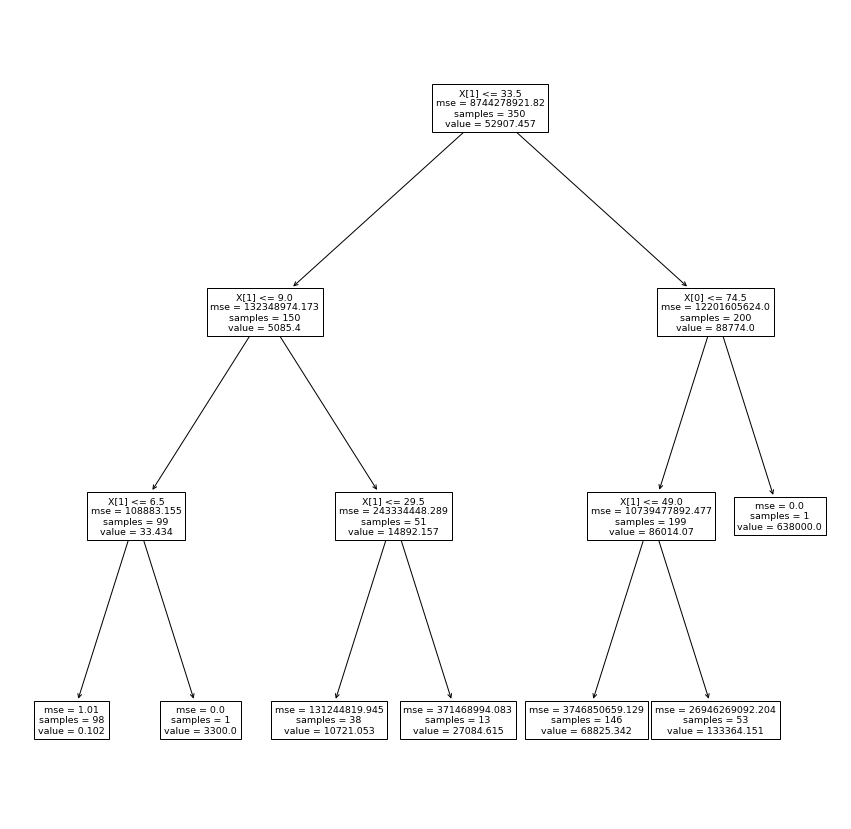

In [85]:
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

## Task
- Insurance dataset(apply decision tree regressor)

## Overfitting problem in decision tree is rectified by random forest